In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib



|--| CNN 1d | CNN 2d |RNN-GRU| RNN-LSTM | Conv 1d RNN | Conv 2d RNN |
|--|--|--|--|--|--|--|
| épocas | 150 | 50 | 20 | 20 | 50 | 50 |
| taxa de aprendizado | 1e-3 | 1e-3 | 1e-4 | 1e-4 | 1e-5 | 1e-5|
| dropout | sim | não | sim | sim | sim | sim|


## Modelos de redes neurais

![](models.png)

*na ordem: CNN 1d, CNN 2dm RNN*

## Preparação dos dados

* Remover stop words com o NLTK
* converter para minusculas, retirar pontuação, etc com o simple_preprocess do gesim
* treinar o modelo skip-gram do word2vec com o gensim

O dataset foi dividido na proporção 75%-25%, ficando da seguinte forma:

* treino: 2250
* teste: 750

In [2]:
df = pd.read_csv("results.csv")
models = df.groupby("model")

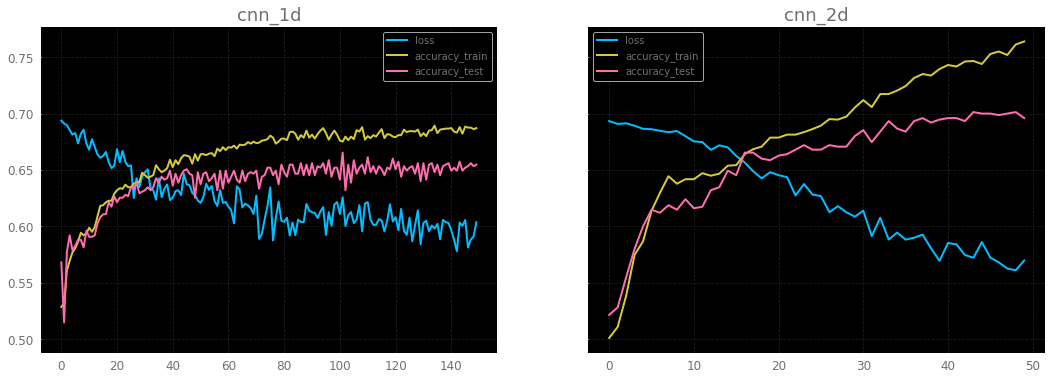

In [3]:
fig, ax = subplots(1, 2, figsize=(18, 6), sharey=True)

for i, model in enumerate(["cnn_1d", "cnn_2d"]):
    group = models.get_group(model)
    group[["loss", "accuracy_train", "accuracy_test"]].plot(ax=ax[i], use_index=False)
    ax[i].set_title(model)

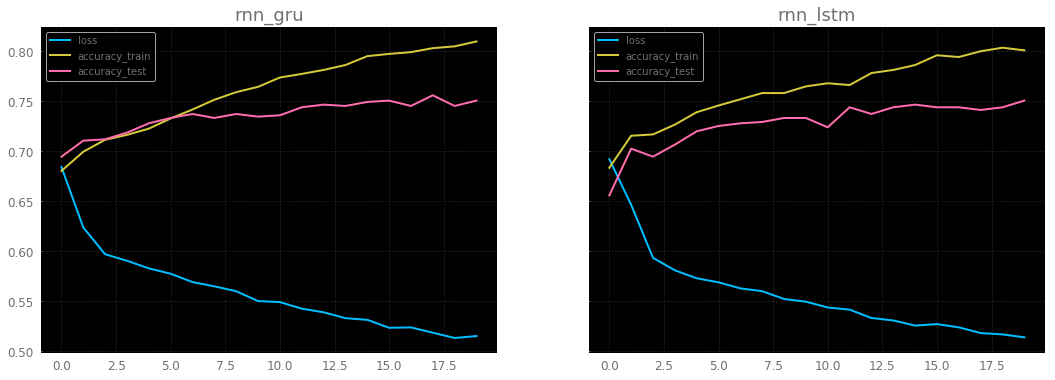

In [12]:
fig, ax = subplots(1, 2, figsize=(18, 6), sharey=True)

for i, model in enumerate(["rnn_gru", "rnn_lstm"]):
    group = models.get_group(model)
    group[["loss", "accuracy_train", "accuracy_test"]].plot(ax=ax[i], use_index=False)
    ax[i].set_title(model)
plt.savefig("/tmp/classification_gru_ltsm.png", transparent=True)

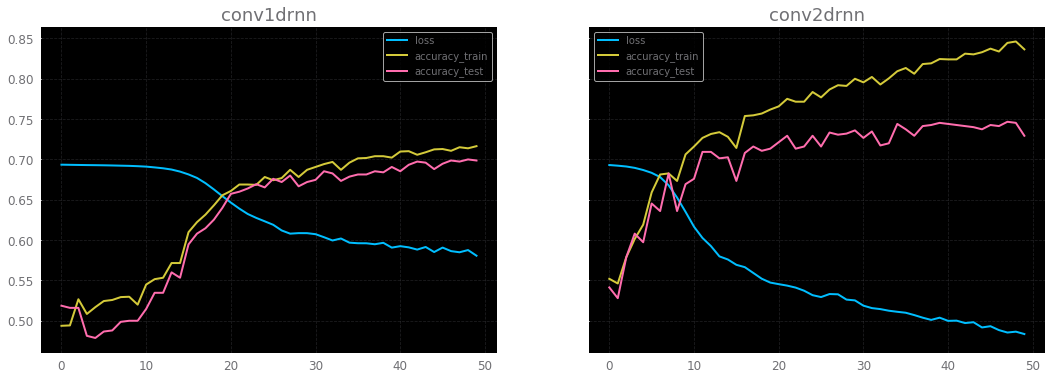

In [15]:
fig, ax = subplots(1, 2, figsize=(18, 6), sharey=True)

for i, model in enumerate(["conv1drnn", "conv2drnn"]):
    group = models.get_group(model)
    group[["loss", "accuracy_train", "accuracy_test"]].plot(ax=ax[i], use_index=False)
    ax[i].set_title(model)
plt.savefig("/tmp/classification_conv_rnn.png", transparent=True)